In [14]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [15]:
data = pd.read_csv(r"/content/drive/MyDrive/Projects/A_Z Handwritten Data.csv").astype('float32')


In [16]:
X = data.drop('0',axis = 1)
y = data['0']

In [17]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

In [18]:
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [19]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

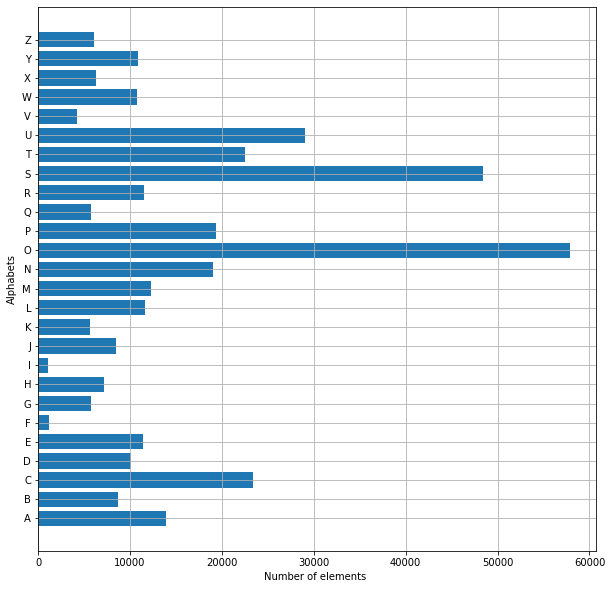

In [20]:
train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

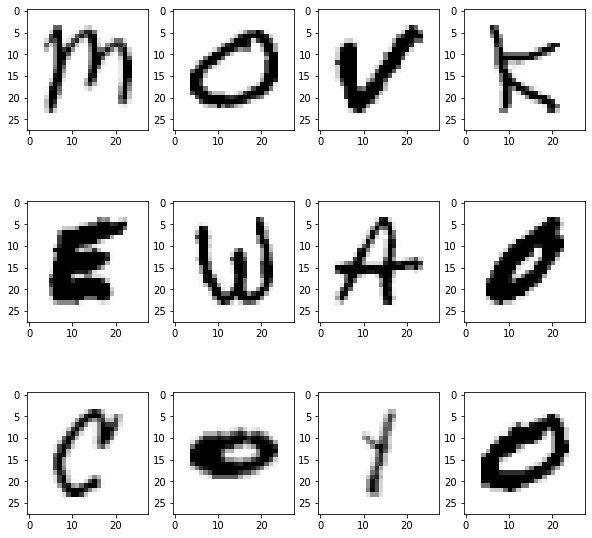

In [21]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,4, figsize = (10,10))
axes = ax.flatten()

for i in range(12):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [22]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)


In [23]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))


model.add(Dense(26,activation ="softmax"))



model.compile(optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history = model.fit(train_X, train_yOHE, epochs=6, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))


model.summary()

Epoch 1/6
9312/9312 [==============================] - 52s 5ms/step - loss: 0.1981 - accuracy: 0.9436 - val_loss: 0.0802 - val_accuracy: 0.9765 - lr: 1.0000e-04
Epoch 2/6
9312/9312 [==============================] - 49s 5ms/step - loss: 0.0634 - accuracy: 0.9821 - val_loss: 0.0596 - val_accuracy: 0.9823 - lr: 1.0000e-04
Epoch 3/6
9312/9312 [==============================] - 44s 5ms/step - loss: 0.0436 - accuracy: 0.9872 - val_loss: 0.0514 - val_accuracy: 0.9847 - lr: 1.0000e-04
Epoch 4/6
9312/9312 [==============================] - 43s 5ms/step - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.0399 - val_accuracy: 0.9889 - lr: 1.0000e-04
Epoch 5/6
9312/9312 [==============================] - 48s 5ms/step - loss: 0.0252 - accuracy: 0.9925 - val_loss: 0.0318 - val_accuracy: 0.9914 - lr: 1.0000e-04
Epoch 6/6
9312/9312 [==============================] - 49s 5ms/step - loss: 0.0194 - accuracy: 0.9939 - val_loss: 0.0387 - val_accuracy: 0.9901 - lr: 1.0000e-04
Model: "sequential_1"
____________

In [ ]:
model.save("/content/drive/MyDrive/Projects/model.h5")

In [26]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9765068888664246, 0.9823331832885742, 0.9847093820571899, 0.9888978600502014, 0.9914485216140747, 0.9900657534599304]
The training accuracy is : [0.9435763359069824, 0.98214191198349, 0.9871962666511536, 0.990347683429718, 0.992458701133728, 0.993942141532898]
The validation loss is : [0.080184206366539, 0.05957668274641037, 0.05139593780040741, 0.039902083575725555, 0.0318230539560318, 0.03865281119942665]
The training loss is : [0.19807405769824982, 0.0633774995803833, 0.043591100722551346, 0.032337963581085205, 0.025157276540994644, 0.019382406026124954]
